In [1]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import epsilon_bandit
from infomercial.local_gym import bandit
from infomercial.exp.epsilon_bandit import load_checkpoint
import gym

In [2]:
bandit

<module 'infomercial.local_gym.bandit' from '/Users/qualia/Code/infomercial/infomercial/local_gym/bandit.py'>

In [3]:
# environments = [
#     ['BanditOneHot2', 'v0', 1],
#     ['BanditOneHot10', 'v0', 1],
#     ['BanditOneHot121', 'v0', 1],
#     ['BanditOneHot1000', 'v0', 1],
#     ['BanditEvenOdds2', 'v0', 1],
#     ['BanditOneHigh2', 'v0', 1],
#     ['BanditOneHigh10', 'v0', 1],
#     ['BanditOneHigh121', 'v0', 1],
#     ['BanditOneHigh1000', 'v0', 1],
#     ['BanditHardAndSparse2', 'v0', 1],
#     ['BanditHardAndSparse10', 'v0', 1],
#     ['BanditHardAndSparse121', 'v0', 1],
#     ['BanditHardAndSparse1000', 'v0', 1],
#     ['BanditGaussian10', 'v0', 1],
# ]

In [3]:
env_name = 'BanditHardAndSparse1000-v0'

# Run bandit exps
result = epsilon_bandit(
    env_name=env_name,
    num_episodes=20000, 
    lr=.1, 
    epsilon=.3,
    epsilon_decay_tau=0.0001,
    seed_value=179,
    save="exptest_epsilon_bandit_result.pkl"
)

/Users/qualia/anaconda3/envs/py3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [5]:
# episodes, actions, scores_R, values_R

episodes = result["episodes"]
actions =result["actions"]
scores_R = result["scores_R"]
values_R = result["values_R"]

Best arm: 526, last arm: 633


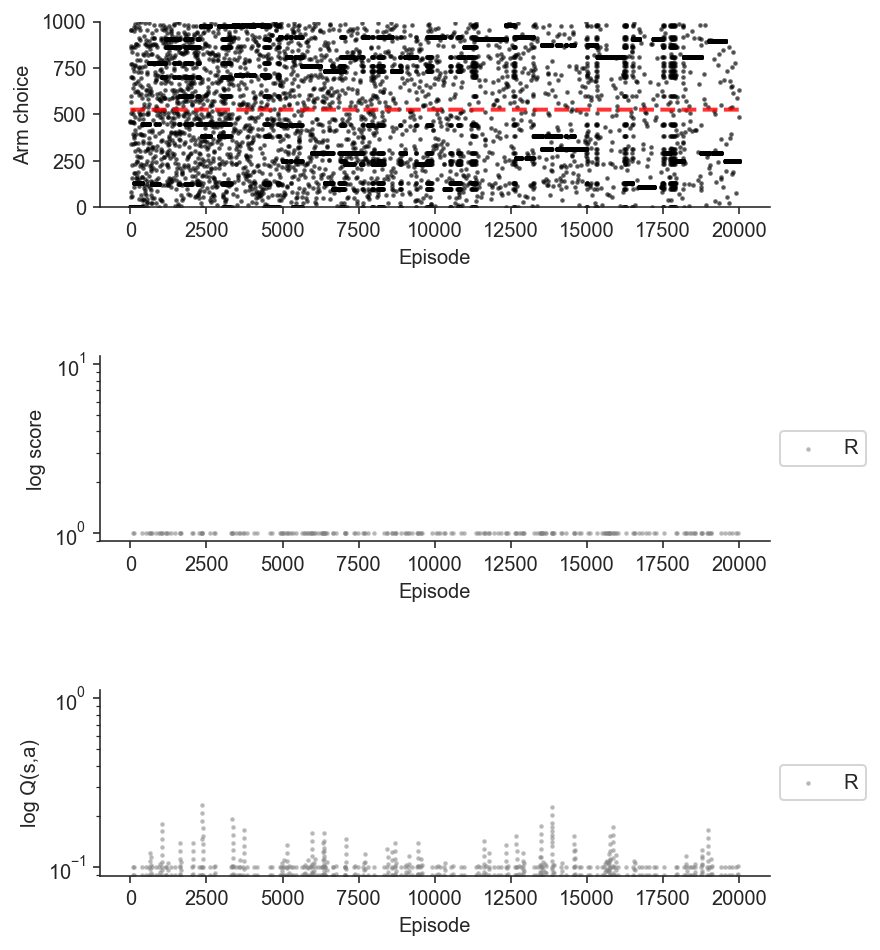

In [6]:
# -
env = gym.make(env_name)
best = env.env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Plotz
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/epsilon_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/epsilon_bandit.eps",  bbox_inches='tight')

In [7]:
# Test load of saved
result_load = load_checkpoint("exptest_epsilon_bandit_result.pkl")

In [8]:
result_load['critic_R']

OrderedDict([(0, 6.463658806637672e-10),
             (1, 7.164183154692674e-10),
             (2, 0.0),
             (3, 0.0),
             (4, 0.0),
             (5, 0),
             (6, 0.0),
             (7, 0.0),
             (8, 0),
             (9, 0.0),
             (10, 0.0),
             (11, 0.0),
             (12, 0.0),
             (13, 0.0),
             (14, 0.0),
             (15, 0),
             (16, 0.0),
             (17, 0.0),
             (18, 0.0),
             (19, 0.0),
             (20, 0),
             (21, 0.0),
             (22, 0.0),
             (23, 0.0),
             (24, 0.0),
             (25, 0.0),
             (26, 0.0),
             (27, 0.0),
             (28, 0.0),
             (29, 0.0),
             (30, 0.0),
             (31, 0),
             (32, 0.0),
             (33, 0.0),
             (34, 0.0),
             (35, 0.0),
             (36, 0.0),
             (37, 0.0),
             (38, 0.0),
             (39, 0.0),
             (40, 0.0),
